<a href="https://colab.research.google.com/github/marcus-wuertz/Client-Presentations/blob/main/Presentation1_4510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## $\color{Blue}{\text{Part 1: Data Cleaning
}}$

#### $\color{Blue}{\text{1: Shape
}}$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import pandas
import pandas as pd
# import data
%cd /content/drive/MyDrive/Python Data
churnData=pd.read_excel('churn.xlsx',sheet_name='BankChurners')

/content/drive/MyDrive/Python Data


In [ ]:
#churnData.head()
#see how many rows and columns are in your dataset
churnData.shape

(10127, 21)

#### $\color{Blue}{\text{2: Missing Values
}}$

In [ ]:
#split data into numeric and categorical components to analyze missing values
import numpy as np
# Numeric component of the churn data set
churnNum=churnData.select_dtypes(include=np.number)
#churnNum.head()
#since 'Client_ID' is not a numeric variable, we'll need to change the data type
#leave it since there wont be a mode for that category?

# categorical component of churn data set
churnCat=churnData.select_dtypes(exclude=np.number)
#churnCat.head()

In [ ]:
# Split data into numeric and categorical components to analyze missing values
import numpy as np

# Numeric component of the churn data set
churnNum = churnData.select_dtypes(include=np.number)
#churnNum.head()

# Categorical component of churn data set
churnCat = churnData.select_dtypes(exclude=np.number)

#since 'Client_ID' is not a numeric variable, we'll need to change the data type
churnCat['Client_ID'] = churnNum['Client_ID'].astype('category')

# Drop 'ClientID' variable from the churnNum group
churnNum = churnNum.drop(columns=['Client_ID'])

In [ ]:
# see if your variable change worked
#churnCat.head()
#churnNum.head()

In [ ]:
# Create a function to calculate the percentage of missing of each variable
# Returns information in descending order

def percent_missing(data):
    return data.isnull().sum().divide(len(data)).sort_values(ascending=False)

In [ ]:
print('Numeric percent missing:')
print(percent_missing(churnNum))

Numeric percent missing:
Total_Revolving_Bal      0.243902
Credit_Limit             0.003456
Total_Ct_Chng_Q4_Q1      0.000691
Total_Amt_Chng_Q4_Q1     0.000494
Avg_Open_To_Buy          0.000099
Age                      0.000000
Dependent_Count          0.000000
Months_With_Bank         0.000000
Products_By_Clients      0.000000
Inactive_In12Mon         0.000000
Contacts_In12Mon         0.000000
Total_Trans_Amt          0.000000
Total_Trans_Ct           0.000000
Avg_Utilization_Ratio    0.000000
dtype: float64


In [ ]:
print('Categorical percent missing:')
print(percent_missing(churnCat))

Categorical percent missing:
Education_Level     0.149995
Income_Category     0.109805
Marital_Status      0.073961
Client_Attrition    0.000000
Gender              0.000000
Card_Category       0.000000
Client_ID           0.000000
dtype: float64


#### $\color{Blue}{\text{3: Imputation
}}$

In [ ]:
#define function for conditional deletion
def cond_delete(data, nan_percent):
    d1 = data.isnull().sum().divide(len(data)).sort_values(ascending=False)
    culprit_vars = []
    for i in range(len(d1.values)):
        if(d1.values[i] >= nan_percent):
            culprit_vars.append(d1.index[i])
    return data[data.columns.difference(culprit_vars)]

In [ ]:
#delete numeric columns with over 15% missing
numDelete=cond_delete(churnNum, 0.15)
#check and make sure your deletion worked
print(numDelete.shape)
print(churnNum.shape)

(10127, 13)
(10127, 14)


In [ ]:
#delete categorical columns with over 15% missing
catDelete=cond_delete(churnCat, 0.15)
#make sure your deletion worked
print(catDelete.shape)
print(churnCat.shape)

(10127, 7)
(10127, 7)


In [ ]:
#find the median after deletion (numeric)
numMed=numDelete.median()

#impute missing data with median
noMissing=numDelete.fillna(numMed)

# now check if data is missing
percent_missing(noMissing)

Age                      0.0
Avg_Open_To_Buy          0.0
Avg_Utilization_Ratio    0.0
Contacts_In12Mon         0.0
Credit_Limit             0.0
Dependent_Count          0.0
Inactive_In12Mon         0.0
Months_With_Bank         0.0
Products_By_Clients      0.0
Total_Amt_Chng_Q4_Q1     0.0
Total_Ct_Chng_Q4_Q1      0.0
Total_Trans_Amt          0.0
Total_Trans_Ct           0.0
dtype: float64

In [ ]:
#find the mode and replace missing catgegorical values
catMode=catDelete.mode().stack().reset_index(level=0,drop=True)

#impute missing data with mode
noMissingCat=catDelete.fillna(catMode)

#check if imputation worked
percent_missing(catDelete)
percent_missing(noMissingCat)

Client_Attrition    0.0
Gender              0.0
Education_Level     0.0
Marital_Status      0.0
Income_Category     0.0
Card_Category       0.0
Client_ID           0.0
dtype: float64

In [ ]:
#reunite your numeric and categorical components
fullData=pd.concat([noMissingCat,noMissing], axis=1)

In [ ]:
fullData.shape

(10127, 20)

## $\color{Blue}{\text{Part 2: Univariate analysis
}}$

#### $\color{Blue}{\text{1: Categorical
}}$

In [ ]:
# we're going to be doing univariate analysis on the client attrition, card_category, marital status, and income category
# Provide a crosstab for attrition by income category
table1=pd.crosstab(index=churnData["Client_Attrition"],columns=churnData["Income_Category"], normalize='index')
table1

Income_Category,$120K+,$40K - $60K,$60K - $80K,$80K - $120K,< $40K
Client_Attrition,,,,,
NO,0.07934,0.200528,0.160132,0.170693,0.389307
YES,0.08750,0.188194,0.131250,0.168056,0.425000


In [ ]:
# crosstab for attrition by card category
table2=pd.crosstab(index=churnData["Client_Attrition"],columns=churnData["Card_Category"], normalize='index')
table2

Card_Category,Blue,Gold,Platinum,Silver
Client_Attrition,,,,
NO,0.931412,0.011176,0.001765,0.055647
YES,0.933620,0.012907,0.003073,0.050400


In [ ]:
#crosstab of attrition by marital status
table3=pd.crosstab(index=churnData["Client_Attrition"],columns=churnData["Marital_Status"], normalize='index')
table3

Marital_Status,Divorced,Married,Single
Client_Attrition,,,
NO,0.079569,0.504822,0.415609
YES,0.080774,0.473298,0.445928


#### $\color{Blue}{\text{2: Numeric
}}$

<Axes: >

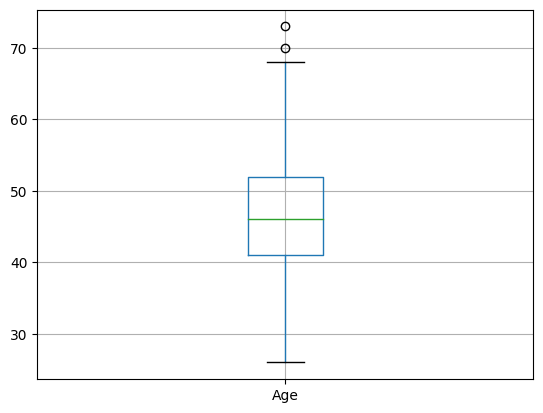

In [ ]:
#provide univariate analyses for the age and credit limit variables

#boxplot of Age
fullData.boxplot(column=['Age'])


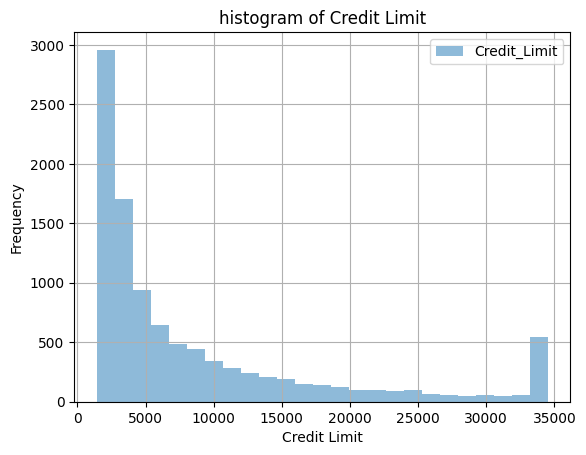

In [ ]:
#provide a histogram of Credit limit
import matplotlib.pylab as plt
fullData.Credit_Limit.hist(bins=25, label='Credit_Limit', alpha=0.5)
plt.title('histogram of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')

plt.legend(loc='best')
plt.show()

## $\color{Blue}{\text{Part 3: Multivariate analysis
}}$

#### $\color{Blue}{\text{1:Avg Numeric by Categorical
}}$

In [ ]:
# find the average of credit limit by attrition
# subset the data
sub_vars=['Credit_Limit','Client_Attrition']
sub_data=fullData[sub_vars]

#split subset data according to categorical variable
grouped=sub_data.groupby('Client_Attrition')
round(grouped.mean(),2)

,Credit_Limit
Client_Attrition,
NO,8735.72
YES,8157.21


The means tell us that the average credit limit is higher in the group that said "No" to attrition. This means that the group that did not close their accounts has a higher average credit limit than the group that did. This could indicate that credit limit is a factor that determines if clients close their account. They may be looking for other credit companies that offer higher credit limits.

In [ ]:
# find the average of age by income category
# subset the data
sub_vars=['Age','Income_Category']
sub_data=fullData[sub_vars]

#split subset data according to categorical variable
grouped=sub_data.groupby('Income_Category')
round(grouped.mean(),2)

,Age
Income_Category,
$120K+,47.60
$40K - $60K,46.09
$60K - $80K,45.97
$80K - $120K,46.43
< $40K,46.29


The means here show us that the higher the income category, the higher the average age is as well. This gives us insight as to what consumers we should target in the future in order to reduce attrition. As we saw earlier, the larger income categories make up less of the group that closed their accounts (attrition), so we can deduce that marketing to older groups could yield lower churn rates. Clients could be leaving our services because they do not make enough money to pay off their credit cards.

#### $\color{Blue}{\text{2: Scatterplot
}}$

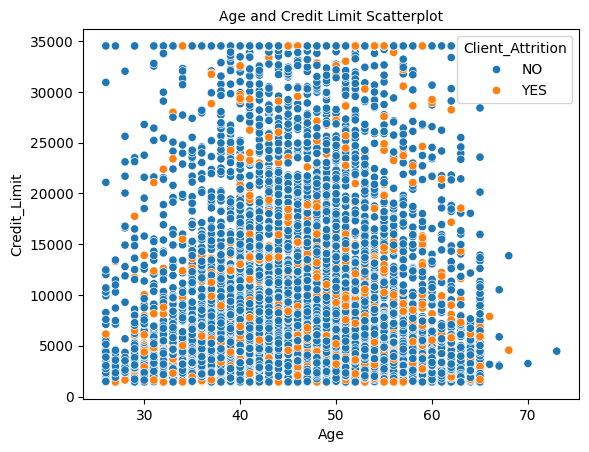

In [ ]:
# using seaborn for scatterplot
import seaborn as sns
sns.scatterplot(data=fullData, x="Age", y="Credit_Limit", hue="Client_Attrition")
plt.title("Age and Credit Limit Scatterplot", fontsize=10)
plt.show()

Using age and credit limit, we can see how those two variables affect attrition. As the credit limit increases, there are fewer clients who closed their accounts. As client's age increases, there is not a significant difference in the frequency of attrition. We can see that credit limit seems to be a more significant factor than age in whether clients close their accounts.

#### $\color{Blue}{\text{3: Heatmap
}}$

/usr/local/lib/python3.10/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  war

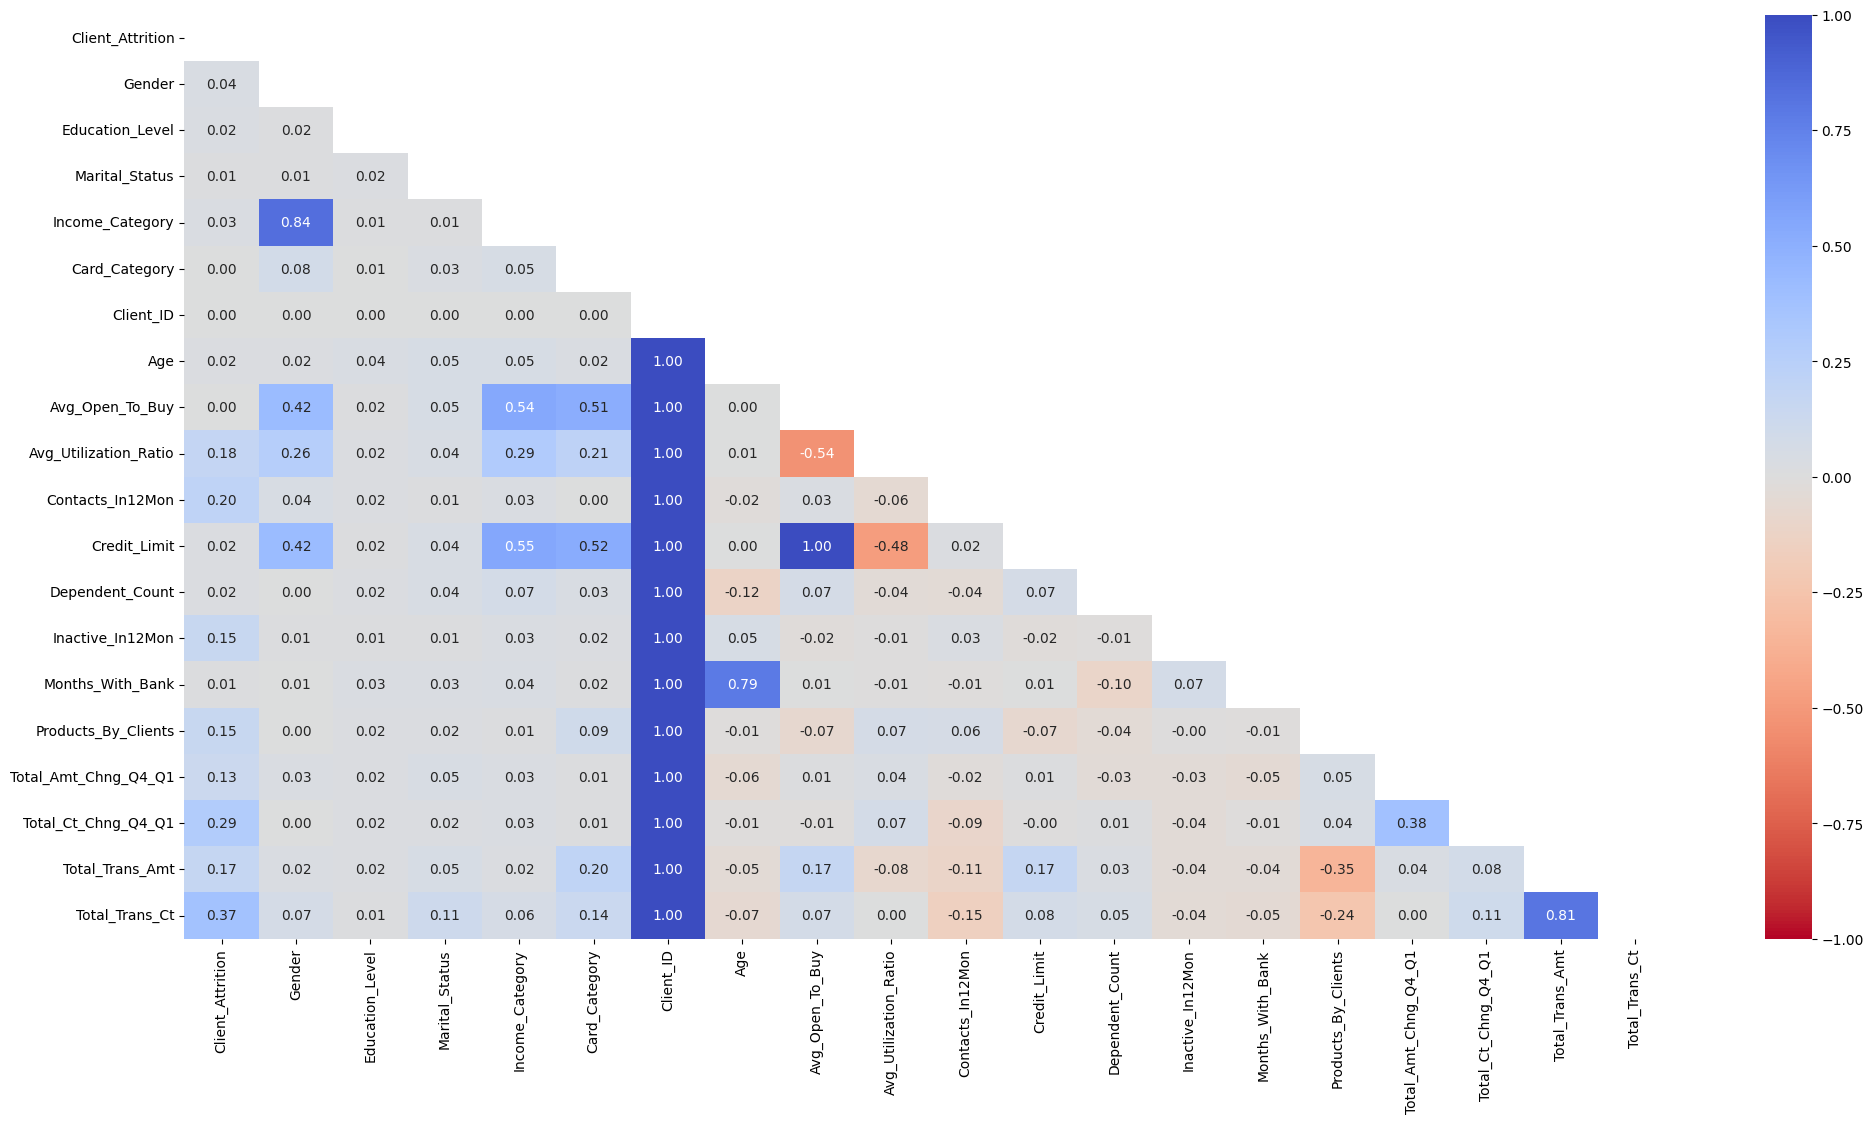

In [ ]:
#!pip install dython
from dython.nominal import associations

# use the function to compute correlation matrix
corrMatrix=associations(dataset=fullData, compute_only=True)['corr']

#retrieve only the upper diagonal of the correlation matrix
maskDiag=np.triu(np.ones_like(corrMatrix, dtype=bool))

#plot the correlation heatmap
plt.figure(figsize=(24,12)) #size of heatmap
sns.heatmap(corrMatrix, annot=True, mask=maskDiag, cmap='coolwarm_r', fmt='.2f',vmin=-1, vmax=1) # the r at the end of coolmap reverses it so that negative is red and positive is blue
plt.show()

None of the varibles are highly correlated with the dependent variable, client attrition. The variables with the highest correlation are total transaction count, total count, and number of contacts within the last twelve months. This shows us that these variables all play a part in people choosing to keep their accounts. Large values in these categories indicate a smaller chance of the client closing their account.

The variables that are least coordinated with the dependent variable are card category, average open to buy, and marital status. None of these are negative, they're at or very close to 0, meaning that changes in these variables do not have significant correlation to the outcome of the dependent variable.

The variables that are coordinated amongst themselves are total transaction amount and total transaction count, months with bank and age, credit limit and average open to buy, and income category and gender. Unfortunately, these correlations do not tell us much about whether or not a client will close their account. Most of these logically make sense, the older the client the more likely they've been with the company for several months. The higher transaction count logically correlates with a higher total transaction amount. The higher the client's credit limit, the more likely the difference in their owed balance and their limit is large. Unfortunately for us, this heatmap does not give us any highly correlated variables that give us insights as to why clients might choose to leave.